In [ ]:
# U2 - Decision Trees med student-mat.csv


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score



Fördelning av klasser (y):
G3
medium    192
low       130
high       73
Name: count, dtype: int64

Form på X (rader, kolumner): (395, 15)


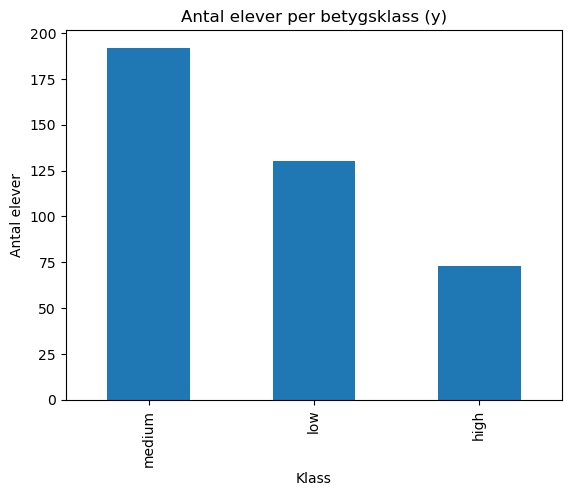

In [2]:
# Cell 2: Läs in student-mat och skapa X (features) och y (tre betygsklasser)

df = pd.read_csv("student-mat.csv", sep=";")

# Välj alla numeriska kolumner
numeric_cols = df.select_dtypes(include=[np.number]).columns

# X = alla numeriska kolumner UTOM G3 (slutbetyget)
X = df[numeric_cols].drop(columns=["G3"])

# y = G3 omvandlat till tre klasser: low / medium / high
bins = [-1, 9, 14, 20]
labels = ["low", "medium", "high"]
y = pd.cut(df["G3"], bins=bins, labels=labels)

print("Fördelning av klasser (y):")
print(y.value_counts())
print("\nForm på X (rader, kolumner):", X.shape)

# Enkel visualisering: stapeldiagram över hur många i varje klass
y.value_counts().plot(kind="bar")
plt.title("Antal elever per betygsklass (y)")
plt.xlabel("Klass")
plt.ylabel("Antal elever")
plt.show()


In [ ]:
# Cell 3: Funktion som kör ett beslutsträd-experiment många gånger (t.ex. 100)

#hej

def run_decision_tree_experiment(X, y, test_size, normalize=False, n_runs=100):
    """
    Kör DecisionTreeClassifier n_runs gånger med samma inställningar.

    Varje gång:
      - ny train/test-split
      - ev. normalisering med MinMaxScaler
      - DecisionTreeClassifier(random_state=None)
      - beräknar accuracy och confusion matrix

    Returnerar:
      - mean_acc : medelaccuracy över alla körningar
      - best_acc : bästa accuracy
      - best_cm  : confusion matrix för körningen med bäst accuracy
    """

    accuracies = []
    best_acc = -1
    best_cm = None

    for _ in range(n_runs):
        # 1. Train/test-split (ingen random_state => ny slump varje gång)
        X_train, X_test, y_train, y_test = train_test_split(
            X,
            y,
            test_size=test_size,
            stratify=y
        )

        # 2. Normalisera eller inte
        if normalize:
            scaler = MinMaxScaler(feature_range=(0, 1))
            X_train_used = scaler.fit_transform(X_train)
            X_test_used = scaler.transform(X_test)
        else:
            X_train_used = X_train.values
            X_test_used = X_test.values

        # 3. Skapa beslutsträd (random_state=None enligt uppgiften)
        clf = DecisionTreeClassifier(random_state=None)

        # 4. Träna och predicera
        clf.fit(X_train_used, y_train)
        y_pred = clf.predict(X_test_used)

        # 5. Accuracy + confusion matrix
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred, labels=labels)

        accuracies.append(acc)

        # Spara bästa körningen (högst accuracy)
        if acc > best_acc:
            best_acc = acc
            best_cm = cm

    mean_acc = np.mean(accuracies)
    return mean_acc, best_acc, best_cm


In [4]:
# Cell 4: Kör alla experiment (4 stycken)

# Två train/test-fördelningar:
#  - 0.10 => 90% train, 10% test
#  - 0.30 => 70% train, 30% test (vår "välj själv")
splits = [
    (0.10, "train=90%, test=10%"),
    (0.30, "train=70%, test=30%")
]

# Två datatyper: original + normaliserat
data_settings = [
    (False, "originaldata"),
    (True,  "normaliserat [0,1]")
]

dt_results = []  # lista där vi sparar resultaten

for test_size, split_text in splits:
    for normalize_flag, data_text in data_settings:
        print("====================================================")
        print(f"Experiment: {split_text}, data = {data_text}")
        print("Kör 100 gånger...")

        mean_acc, best_acc, best_cm = run_decision_tree_experiment(
            X,
            y,
            test_size=test_size,
            normalize=normalize_flag,
            n_runs=100
        )

        print(f"\nMedelaccuracy över 100 körningar: {mean_acc:.4f}")
        print(f"Bästa accuracy av 100 körningar: {best_acc:.4f}")
        print("Confusion matrix för bästa körningen (low, medium, high):")
        print(best_cm)

        # Spara resultatet
        dt_results.append({
            "Split": split_text,
            "Test_size": test_size,
            "Data_typ": data_text,
            "Medelaccuracy": mean_acc,
            "Bästa_accuracy": best_acc,
            "Best_CM": best_cm
        })



Experiment: train=90%, test=10%, data = originaldata
Kör 100 gånger...

Medelaccuracy över 100 körningar: 0.8565
Bästa accuracy av 100 körningar: 0.9750
Confusion matrix för bästa körningen (low, medium, high):
[[12  1  0]
 [ 0 20  0]
 [ 0  0  7]]
Experiment: train=90%, test=10%, data = normaliserat [0,1]
Kör 100 gånger...

Medelaccuracy över 100 körningar: 0.8345
Bästa accuracy av 100 körningar: 0.9500
Confusion matrix för bästa körningen (low, medium, high):
[[13  0  0]
 [ 1 18  1]
 [ 0  0  7]]
Experiment: train=70%, test=30%, data = originaldata
Kör 100 gånger...

Medelaccuracy över 100 körningar: 0.8389
Bästa accuracy av 100 körningar: 0.8992
Confusion matrix för bästa körningen (low, medium, high):
[[37  2  0]
 [ 8 49  1]
 [ 0  1 21]]
Experiment: train=70%, test=30%, data = normaliserat [0,1]
Kör 100 gånger...

Medelaccuracy över 100 körningar: 0.8362
Bästa accuracy av 100 körningar: 0.8992
Confusion matrix för bästa körningen (low, medium, high):
[[34  5  0]
 [ 3 52  3]
 [ 0  1 2

In [5]:
# Cell 5: Tabell med alla Decision Tree-experiment (som Figur A2)

dt_df = pd.DataFrame([
    {
        "Split": r["Split"],
        "Data_typ": r["Data_typ"],
        "Medelaccuracy": r["Medelaccuracy"],
        "Bästa_accuracy": r["Bästa_accuracy"]
    }
    for r in dt_results
])

print("Alla Decision Tree-experiment:")
display(dt_df)



Alla Decision Tree-experiment:


,Split,Data_typ,Medelaccuracy,Bästa_accuracy
0,"train=90%, test=10%",originaldata,0.856500,0.97500
1,"train=90%, test=10%","normaliserat [0,1]",0.834500,0.95000
2,"train=70%, test=30%",originaldata,0.838908,0.89916
3,"train=70%, test=30%","normaliserat [0,1]",0.836218,0.89916


In [6]:
# Cell 6: Hitta de tre bästa experimenten och visa confusion matrices

dt_top3 = dt_df.sort_values(by="Medelaccuracy", ascending=False).head(3)

print("Tre bästa Decision Tree-experiment (sorterat efter medelaccuracy):")
display(dt_top3)

print("\nConfusion matrices för de tre bästa experimenten:\n")

for i, row in dt_top3.reset_index(drop=True).iterrows():
    split_text = row["Split"]
    data_text = row["Data_typ"]
    mean_acc = row["Medelaccuracy"]

    # Hitta motsvarande entry i dt_results för att få rätt confusion matrix
    for r in dt_results:
        if r["Split"] == split_text and r["Data_typ"] == data_text:
            best_cm = r["Best_CM"]
            best_acc = r["Bästa_accuracy"]
            break

    print("========================================")
    print(f"Experiment {i+1}:")
    print(f"Split: {split_text}")
    print(f"Data: {data_text}")
    print(f"Medelaccuracy (100 körningar): {mean_acc:.4f}")
    print(f"Bästa accuracy av 100 körningar: {best_acc:.4f}")
    print("Confusion matrix (low, medium, high):")
    print(best_cm)




Tre bästa Decision Tree-experiment (sorterat efter medelaccuracy):


,Split,Data_typ,Medelaccuracy,Bästa_accuracy
0,"train=90%, test=10%",originaldata,0.856500,0.97500
2,"train=70%, test=30%",originaldata,0.838908,0.89916
3,"train=70%, test=30%","normaliserat [0,1]",0.836218,0.89916



Confusion matrices för de tre bästa experimenten:

Experiment 1:
Split: train=90%, test=10%
Data: originaldata
Medelaccuracy (100 körningar): 0.8565
Bästa accuracy av 100 körningar: 0.9750
Confusion matrix (low, medium, high):
[[12  1  0]
 [ 0 20  0]
 [ 0  0  7]]
Experiment 2:
Split: train=70%, test=30%
Data: originaldata
Medelaccuracy (100 körningar): 0.8389
Bästa accuracy av 100 körningar: 0.8992
Confusion matrix (low, medium, high):
[[37  2  0]
 [ 8 49  1]
 [ 0  1 21]]
Experiment 3:
Split: train=70%, test=30%
Data: normaliserat [0,1]
Medelaccuracy (100 körningar): 0.8362
Bästa accuracy av 100 körningar: 0.8992
Confusion matrix (low, medium, high):
[[34  5  0]
 [ 3 52  3]
 [ 0  1 21]]


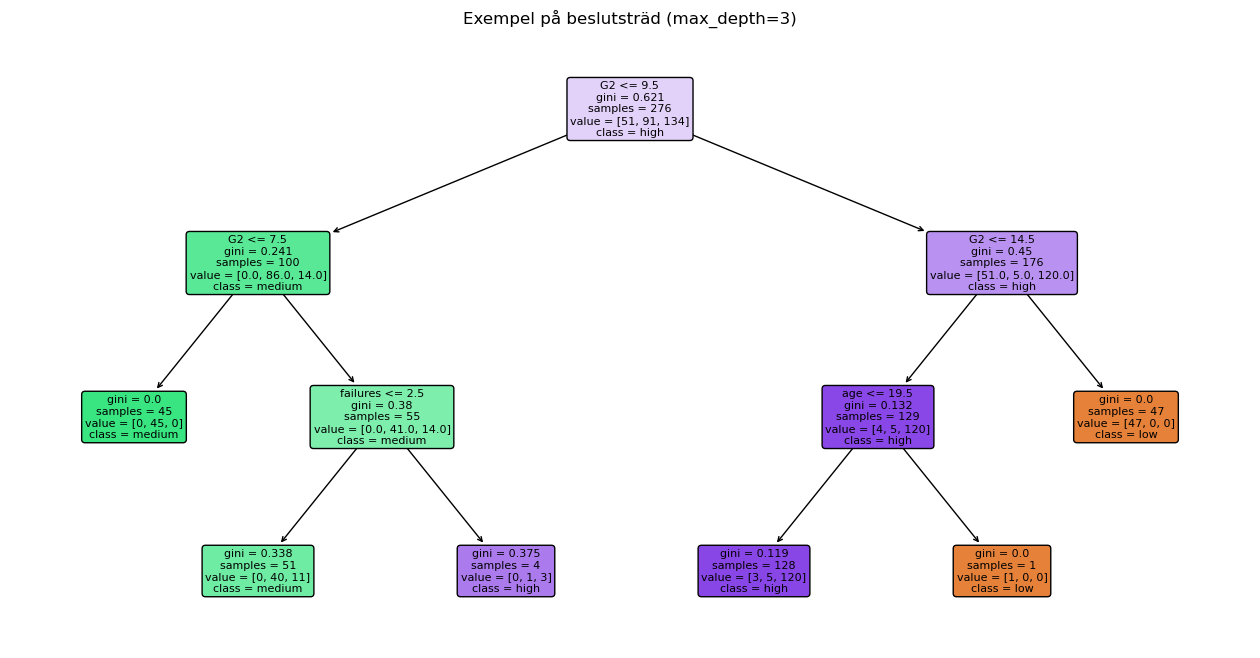

In [7]:
# Cell 7 (extra): Visualisera ett beslutsträd

# Vi väljer t.ex. 70/30, originaldata för att rita ett litet träd
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    stratify=y
)

# Träna ett grunt träd så att bilden blir läsbar
clf_vis = DecisionTreeClassifier(random_state=None, max_depth=3)
clf_vis.fit(X_train, y_train)

plt.figure(figsize=(16, 8))
plot_tree(
    clf_vis,
    feature_names=X.columns,
    class_names=labels,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Exempel på beslutsträd (max_depth=3)")
plt.show()

